# Time integration

In [ ]:
from lucifex.fdm import CN
from lucifex.fem import Constant
from lucifex.sim import (
    run, stopper, writer, 
)
from lucifex.viz import plot_line
from py.diffusion import diffusion_simulation_1d


simulation = diffusion_simulation_1d(store_delta=1)(
    Lx=1.0,
    Nx=200,
    dt=0.123,
    m_exponent=2,
    D_fdm=CN,
)

n_stop = 30
run(simulation, n_stop=n_stop)
u = simulation['u']

print(f'n_stop = {n_stop}')
print(f'length of stored series = {len(u.series)}')

n_stop = 30
length of stored series: 30


## Stopping criteria

(<Figure size 640x480 with 1 Axes>, <Axes: >)

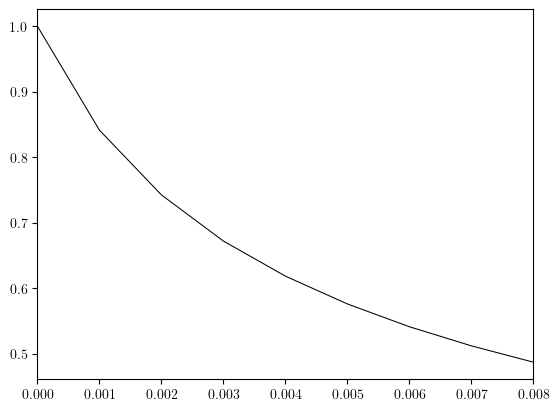

In [ ]:
def is_less_than(
    u: Constant,
    u_thresh: float,
) -> bool:
    return u.value < u_thresh

simulation = diffusion_simulation_1d(store_delta=1)(
    Lx=1.0,
    Nx=200,
    dt=0.001,
    m_exponent=2,
    D_fdm=CN,
)
uMax = simulation['uMax']

uMax_thresh = 0.5
uMaX_stopper = stopper(uMax[-1], is_less_than)(uMax_thresh)

n_stop = 500
run(simulation, n_stop=n_stop, stoppers=[stopper])

plot_line((uMax.time_series, uMax.value_series))

## Writing criteria

In [ ]:
def is_in_range(
    u: Constant,
    u_low: float,
    u_high: float,
) -> bool:
    return u.value < u_high and u.value > u_low

simulation = diffusion_simulation_1d(store_delta=1)(
    Lx=1.0,
    Nx=200,
    dt=0.001,
    m_exponent=2,
    D_fdm=CN,
)
name = 'uMax'
uMax = simulation['uMax']

u_high = 0.8
u_low = 0.6
routine = lambda t, u: print(f'Is in range: {name}={float(u)} when t={t}')
uMax_writer_func = writer(uMax[-1], is_in_range, routine)(u_low, u_high)

n_step = 10
routine = lambda t, u: print(f'Every {n_step} steps: {name}={float(u)} when t={t}')
uMax_writer_int = writer(uMax[0], n_step, routine)

dt_step = 0.025
routine = lambda t, u: print(f'Every {dt_step} time units: {name}={float(u)} when t={t}')
uMax_writer_float = writer(uMax[0], dt_step, routine)

n_stop = 100
run(simulation, n_stop=n_stop, writers=[uMax_writer_func, uMax_writer_int, uMax_writer_float])


Every 10 steps: uMax=1.0 when t=0.0
Every 0.025 time units: uMax=1.0 when t=0.0
Is in range: uMax=0.7426085866573291 when t=0.003
Is in range: uMax=0.6721698675527306 when t=0.004
Is in range: uMax=0.6186676969163538 when t=0.005
Every 10 steps: uMax=0.4468124513366197 when t=0.010000000000000002
Every 10 steps: uMax=0.3332107831894998 when t=0.02000000000000001
Every 0.025 time units: uMax=0.3013699618703342 when t=0.025000000000000015
Every 10 steps: uMax=0.2770456194669906 when t=0.03000000000000002
Every 10 steps: uMax=0.2411556308719679 when t=0.04000000000000003
Every 10 steps: uMax=0.21447111437714894 when t=0.05000000000000004
Every 0.025 time units: uMax=0.21447111437714894 when t=0.05000000000000004
Every 10 steps: uMax=0.19266436221981578 when t=0.060000000000000046
Every 10 steps: uMax=0.17387894340641383 when t=0.07000000000000005
Every 0.025 time units: uMax=0.165331473127665 when t=0.07500000000000005
Every 10 steps: uMax=0.1572583538120769 when t=0.08000000000000006
Eve